<a href="https://colab.research.google.com/github/L-neis/exemplos-CN/blob/main/unidade6_Interpola%C3%A7%C3%A3oCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aproximação de funções: Interpolação



Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: o Método dos Mínimos Quadrados e a Interpolação polinomial. A seguir, apresentamos alguns exemplos de resolução em Python. Vamos utilizar as bibliotecas numpy e scipy.

**Interpolação Polinomial**

Vamos estudar métodos numéricos que permitem determinar um polinômio que passe por $n+1$ pontos conhecidos, denotados por $(x_0,y_0)$, $(x_1,y_1)$, $\ldots$, $(x_n,y_n)$, com $x_0\neq x_1\neq \ldots \neq x_n$. Em outras palavras, considere a tabela

$$\begin{array}{c|cccc}
x & x_0 & x_1 & \ldots & x_n \\
\hline
f(x) & f(x_0) & f(x_1) & \ldots & f(x_n) \\
\end{array}$$
sendo $f(x_i)=y_i$ para $i=0,1,\ldots, n$. Interpolar $x$ a tabela significa calcular $f(x)$, ou seja, incluir $(x,f(x))$ à tabela. Neste caso, vamos obter um polinômio aproximador $p(x)$ tal que $p(x_i) = y_i$, para $i=0,1,\ldots,n.$


Vamos estudar três formas de se obter um polinômio interpolador:

1.  Resolvendo um sistema linear.
2.  Fórmula de Lagrange.
3.  Forma de Newton.

O próximo resultado garante a existência e unicidade  do polinômio interpolador de uma tabela com $n+1$ pontos dados.

**Proposição:**

Dados $n+1$ pontos $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, com $x_0,x_1,\ldots,x_n$ distintos entre si, existe um único polinômio interpolador $p(x)$ de grau menor ou igual a $n$ que passa por esses pontos, ou seja, $p(x_i)=y_i$, para $i=0,1,\ldots,n$.

*demonstração:*

Seja $p(x)=a_0+a_1x+a_2x^2+\ldots+a_nx^n$ um polinômio de grau menor ou igual a $n$. Queremos determinar $a_0,a_1,\ldots,a_n$ de modo que: $p(x_i)=y_i$. Ou seja,
$$\begin{array}{cccccccccccccc}
p(x_0) & = & a_0 & + & a_1x_0 & + a_2x_0^2 & \ldots & + & a_nx_0^n = y_0\\
p(x_1) & = & a_0 & + & a_1x_1 & + a_2x_1^2 & \ldots & + & a_nx_1^n = y_1\\
\vdots \\
p(x_n) & = & a_0 & + & a_1x_n & + a_2x_n^2 & \ldots & + & a_nx_n^n = y_n\\
\end{array}$$

Na notação matricial,

$$\left(\begin{array}{ccccc}
1 & x_0 & x_0^2 & \ldots & x_0^n \\
1 & x_1 & x_1^2 & \ldots & x_1^n \\
\vdots \\
1 & x_n & x_n^2 & \ldots & x_n^n
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1\\
\vdots\\
a_n
\end{array}\right)=\left(\begin{array}{c}
y_0\\
y_1\\
\vdots\\
y_n
\end{array}\right)$$

Para mostrar a existência e unicidade do polinômio interpolador precisamos mostrar que o sistema linear tenha única solução.

Vamos considerar $n=1$ então temos o sistema linear:
$$\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1
\end{array}\right)\left(\begin{array}{c}
a_0\\
a_1
\end{array}\right)=\left(\begin{array}{c}
y_0\\
y_1
\end{array}\right)$$

Como $x_0\neq x_1$ a matriz possui linhas linearmente independentes  e portanto o determinante é diferente de zero. Logo, a matriz é inversível e o sistema linear possui única solução. De forma análoga, usando o princípio da indução, verificamos para o caso geral, onde obtemos um sistema $(n+1)\times (n+1)$, já que $x_0\neq x_1\neq \ldots\neq x_n$.

*Exemplo 1:*

Determinar o polinômio que interpola $\displaystyle{f(x)=\dfrac{1}{x^2}}$ nos pontos $x_0=2,x_1=2.5$ e $x_2=4$.

 Pelo teorema, existe um único polinômio de grau $\le 2$ que interpola os dados, ou seja, $p(x)=a_0+a_1x+a_2x^2$. Usando a condição $p(x_i)=f(x_i)$, com $i=0,1,2$, obtemos o sistema de equações:

  $$\left(\begin{array}{ccc}
    1 & 2 & 4\\
    1 & 2.5 & 6.25\\
    1 & 4 & 16\\
  \end{array}\right)\left(\begin{array}{c}
    a_0\\
    a_1\\
    a_2\\
  \end{array}\right)=\left(\begin{array}{c}
    0.25\\
    0.16\\
    0.0625\\
  \end{array}\right)$$

  Que tem como solução: $a_0=0.8975, a_1=-0.43875$ e $a_2=0.0575$. Portanto, o polinômio interpolador é $p(x)=0.8975-0.43875x+0.0575x^2$.

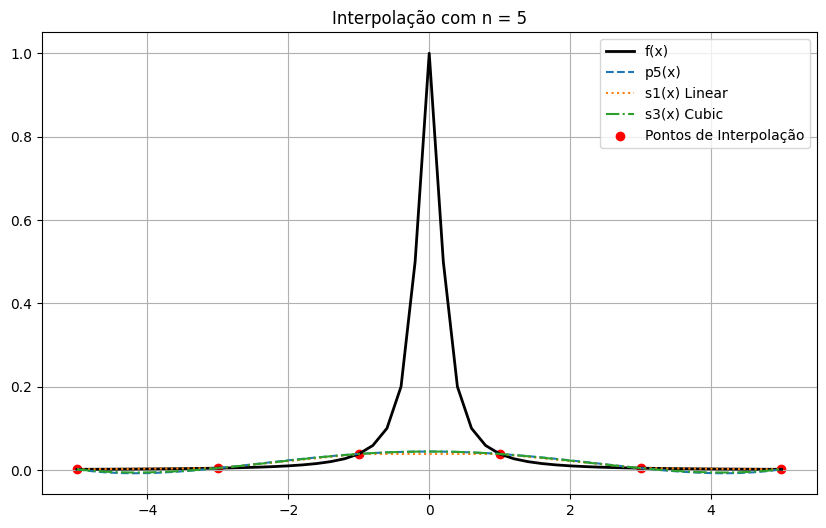

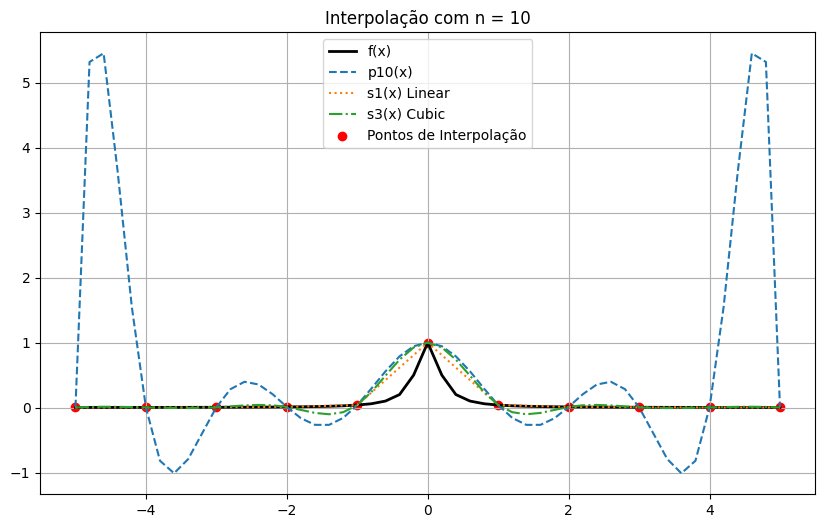

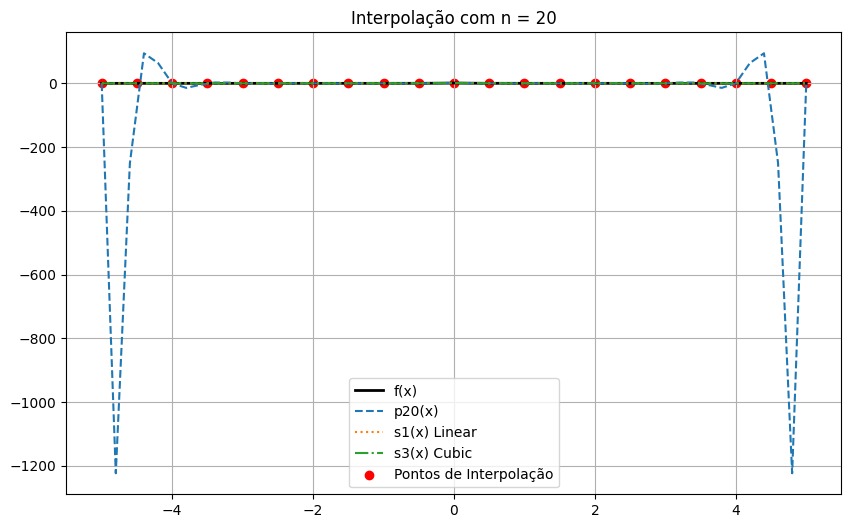

Tabela de Erros:
n = 5: Erro Máx. p_n(x) = 0.956, Erro Máx. s1(x) = 0.962, Erro Máx. s3(x) = 0.956
n = 10: Erro Máx. p_n(x) = 5.454, Erro Máx. s1(x) = 0.415, Erro Máx. s3(x) = 0.537
n = 20: Erro Máx. p_n(x) = 1223.084, Erro Máx. s1(x) = 0.155, Erro Máx. s3(x) = 0.268


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
from scipy.interpolate import BarycentricInterpolator

def f(x):
    return 1 / (1 + 25 * x**2)

a, b = [-5, 5]
N = 50
z = np.linspace(a, b, N + 1)

def max_error(f_vals, interp_vals):
    return np.max(np.abs(f_vals - interp_vals))

n_values = [5, 10, 20]
errors_pn, errors_s1, errors_s3 = [], [], []

for n in n_values:
    x = np.linspace(a, b, n + 1)
    y = f(x)

    f_vals = f(z)

    pn = BarycentricInterpolator(x, y)
    pn_vals = pn(z)
    errors_pn.append(max_error(f_vals, pn_vals))

    s1 = interp1d(x, y, kind='linear')
    s1_vals = s1(z)
    errors_s1.append(max_error(f_vals, s1_vals))

    s3 = CubicSpline(x, y)
    s3_vals = s3(z)
    errors_s3.append(max_error(f_vals, s3_vals))

    plt.figure(figsize=(10, 6))
    plt.plot(z, f_vals, label='f(x)', color='black', linewidth=2)
    plt.plot(z, pn_vals, label=f'p{n}(x)', linestyle='--')
    plt.plot(z, s1_vals, label=f's1(x) Linear', linestyle=':')
    plt.plot(z, s3_vals, label=f's3(x) Cubic', linestyle='-.')
    plt.scatter(x, y, label='Pontos de Interpolação', color='red')
    plt.title(f'Interpolação com n = {n}')
    plt.legend()
    plt.grid(True)
    plt.show()

error_table = {
    "n": n_values,
    "Erro Máx. p_n(x)": errors_pn,
    "Erro Máx. s1(x)": errors_s1,
    "Erro Máx. s3(x)": errors_s3,
}
print("Tabela de Erros:")
for i, n in enumerate(error_table["n"]):
    print(f"n = {n}: Erro Máx. p_n(x) = {errors_pn[i]:.3f}, "
          f"Erro Máx. s1(x) = {errors_s1[i]:.3f}, "
          f"Erro Máx. s3(x) = {errors_s3[i]:.3f}")

**Exercício 1:**

Dada a tabela de valores da função $f(x)=e^x$. Aproxime (interpole) $f(x)$ em $x=1.32$.

$$\begin{array}{c|ccc}
x & 1.3 & 1.4 & 1.5 \\
\hline
f(x) & 3.669 & 4.055 & 4.482 \\
\end{array}$$

Exemplo 2:

Dada a tabela de valores
$$\begin{array}{c|ccccccc}
x & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8\\
\hline
f(x) & 0.5 & 0.6 & 0.9 & 0.8 & 1.2 & 1.5 & 1.7 & 2\\
\end{array}$$

Obtenha o polinômio que interpola os dados da tabela.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def polin(x, c):
    y = c[0]
    n = len(c)
    for i in range(1,n):
        y += c[i]*x**i
    return y

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0.5, 0.6, 0.9, 0.8, 1.2, 1.5, 1.7, 2]
n = len(x)
A = np.zeros((n,n))

for j in range (n):
   for i in range (n):
      A[i][j] = x[i]**j

c = np.linalg.solve(A, y)
print(c)
xx = np.linspace(1,8,101)
yy = polin(xx, c)

plt.figure(1)
plt.plot(x, y, 'o', label='Dados')
plt.plot(xx, yy, label='Polinomio')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Algoritmo: Diferenças Divididas**

1.   Dados $x_i$ e $f(x_i)$,  $n+1$ pontos.
2.   Para $i=0:n$
3.   $\hspace{1pc}$  $d_{i0}=f(x_i)$
4.   Para $k = 1:n$
5.   $\hspace{1pc}$ Para $i=0:n-k$
6.   $\hspace{2pc} d_{ik}=\dfrac{d_{i+1,k-1}-d_{i,k-1}}{x_{i+k}-x_i}$

